In [31]:
import numpy as np
import pandas as pd
import pickle
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import seaborn as sns 

from olympus.utils.misc import get_pareto_set

In [15]:
res_rand = pickle.load(open('multfonseca_gauss_random/results.pkl', 'rb'))
for res in res_rand:
    res['iter'] = np.arange(30)+1
res_bo = pickle.load(open('multfonseca_gauss_qnehvi/results.pkl', 'rb'))
for res in res_bo:
    res['iter'] = np.arange(30)+1
print(len(res_rand), len(res_bo))


res_b5_qnehvi = pickle.load(open('multviennet_gauss_qnehvi/results.pkl', 'rb'))
for res in res_b5_qnehvi:
    res['iter'] = np.arange(30)+1
    res['batch'] = [i//5 for i in range(30)]
    
res_b2_qnehvi = pickle.load(open('multviennet_gauss_qnehvi_b2/results.pkl', 'rb'))
for res in res_b2_qnehvi:
    res['iter'] = np.arange(40)+1
    res['batch'] = [i//2 for i in range(40)]
    
    
res_b5_seq = pickle.load(open('multviennet_gauss_sequential/results.pkl', 'rb'))
for res in res_b5_seq:
    res['iter'] = np.arange(40)+1
    res['batch'] = [i//5 for i in range(40)]
    
res_b5_rand = pickle.load(open('multviennet_gauss_random/results.pkl', 'rb'))
for res in res_b5_rand:
    res['iter'] = np.arange(40)+1
    res['batch'] = [i//5 for i in range(40)]

100 19


In [16]:
df_rand = pd.concat(res_rand)
df_bo = pd.concat(res_bo)
df_b5_qnehvi = pd.concat(res_b5_qnehvi)
df_b5_seq = pd.concat(res_b5_seq)
df_b5_rand = pd.concat(res_b5_seq)
df_b2_qnehvi = pd.concat(res_b2_qnehvi)

print(df_rand.shape, df_bo.shape, df_b5_qnehvi.shape, df_b5_seq.shape, df_b2_qnehvi.shape)

(3000, 8) (570, 8) (600, 11) (800, 11) (800, 11)


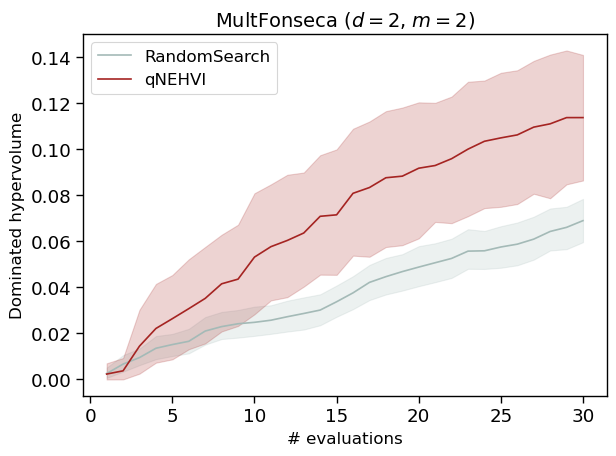

In [68]:
# hypervolume traces
fig, ax = plt.subplots()
sns.lineplot(data=df_rand, x='iter', y='hypervolume', label='RandomSearch', ax=ax, c='#A4BAB7')
sns.lineplot(data=df_bo, x='iter', y='hypervolume', label='qNEHVI', ax=ax, c='#A52422')
# ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=12)
ax.set_xlabel('# evaluations',fontsize=12)
ax.set_ylabel('Dominated hypervolume', fontsize=12)
ax.set_title(r'MultFonseca ($d=2$, $m=2$)', fontsize=14)

plt.tight_layout()
plt.savefig('multfonseca_gauss.png', dpi=300)

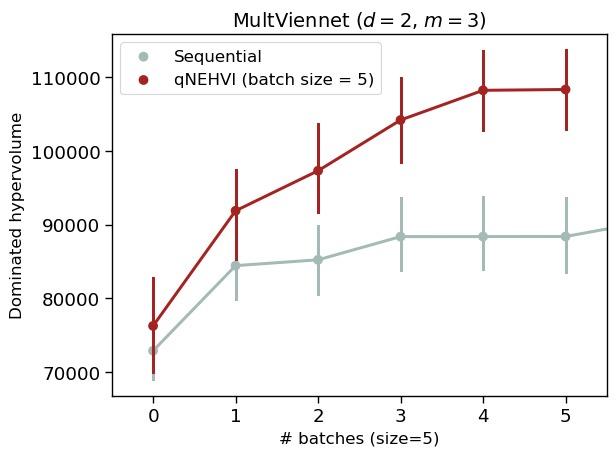

In [22]:
# hypervolume traces
fig, ax = plt.subplots()
sns.pointplot(data=df_b5_seq, x='batch', y='hypervolume', label='Sequential', ax=ax, color='#A4BAB7')
sns.pointplot(data=df_b5_qnehvi, x='batch', y='hypervolume', label='qNEHVI (batch size = 5)', ax=ax, color='#A52422')
# ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=12)
ax.set_xlabel('# batches (size=5)',fontsize=12)
ax.set_ylabel('Dominated hypervolume', fontsize=12)
ax.set_title(r'MultViennet ($d=2$, $m=3$)', fontsize=14)

plt.tight_layout()
#plt.savefig('multviennet_gauss_qnehvi_seq.png', dpi=300)

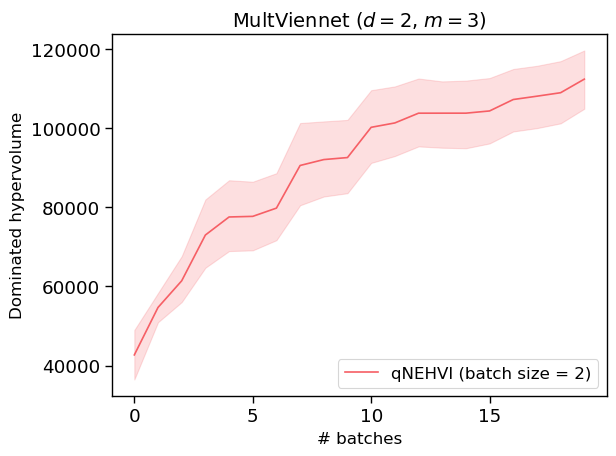

In [21]:
# hypervolume traces
fig, ax = plt.subplots()
# sns.lineplot(data=df_b5_seq, x='iter', y='hypervolume', label='Sequential', ax=ax, color='#A4BAB7')
# sns.lineplot(data=df_b5_qnehvi, x='iter', y='hypervolume', label='qNEHVI (batch size = 5)', ax=ax, color='#A52422')
sns.lineplot(data=df_b2_qnehvi, x='batch', y='hypervolume', label='qNEHVI (batch size = 2)', ax=ax, color='#f65f65')
# ax.set_yscale('log')
ax.legend(loc='lower right', fontsize=12)
ax.set_xlabel('# batches',fontsize=12)
ax.set_ylabel('Dominated hypervolume', fontsize=12)
ax.set_title(r'MultViennet ($d=2$, $m=3$)', fontsize=14)

plt.tight_layout()

<IPython.core.display.Javascript object>


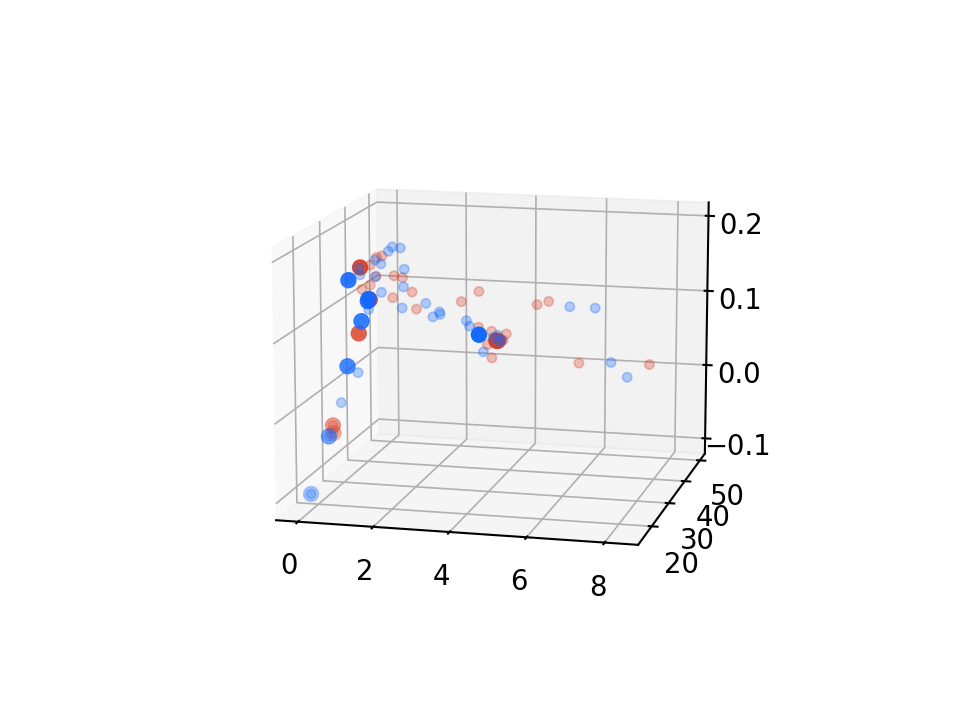

In [38]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ix=0
# random sampling
params = res_b5_rand[ix][['param0','param1']].values
objs   = res_b5_rand[ix][['noiseless_obj0', 'noiseless_obj1', 'noiseless_obj2']].values

pareto_front, pareto_set = get_pareto_set(params, objs)
pareto_front_sorted = sorted(
    [[pareto_front[i,0], pareto_front[i,1], pareto_front[i,2]] for i in range(len(pareto_front))], reverse=False,
)
pareto_front_sorted = np.array(pareto_front_sorted)


ax.scatter(
    objs[:,0],
    objs[:,1],
    objs[:,2],
    c='#156afe',
    alpha=0.3,
    label='RandomSearch',
)
ax.scatter(
    pareto_front_sorted[:,0],
    pareto_front_sorted[:,1],
    pareto_front_sorted[:,2],
    c='#156afe',
    s=50,
    #label='RandomSearch',
)


params = res_b5_qnehvi[ix][['param0','param1']].values
objs   = res_b5_qnehvi[ix][['noiseless_obj0', 'noiseless_obj1', 'noiseless_obj2']].values

pareto_front, pareto_set = get_pareto_set(params, objs)
pareto_front_sorted = sorted(
    [[pareto_front[i,0], pareto_front[i,1],pareto_front[i,2]] for i in range(len(pareto_front))], reverse=False,
)
pareto_front_sorted = np.array(pareto_front_sorted)


ax.scatter(
    objs[:,0],
    objs[:,1],
    objs[:,2],
    c='#d93d23',
    alpha=0.3,
    label='qNEHVI',
)
ax.scatter(
    pareto_front_sorted[:,0],
    pareto_front_sorted[:,1],
    pareto_front_sorted[:,2],
    c='#d93d23',
    s=50,
    label='qNEHVI',
)

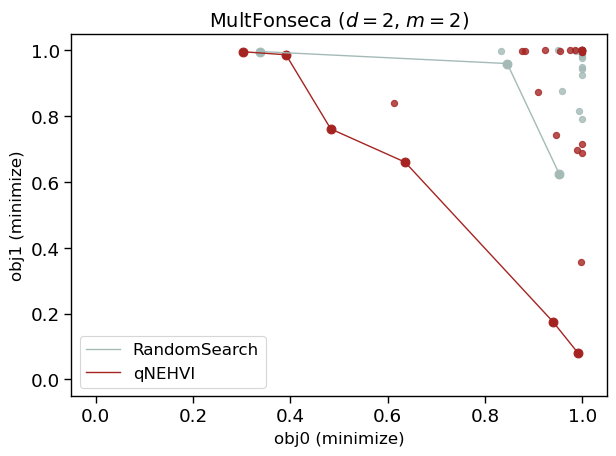

In [69]:
# scatterplot of pareto front

fig, ax = plt.subplots(1, 1)

ix = 15

params = res_rand[ix][['param0','param1']].values
objs   = res_rand[ix][['noiseless_obj0', 'noiseless_obj1']].values


pareto_front, pareto_set = get_pareto_set(params, objs)

pareto_front_sorted = sorted(
    [[pareto_front[i,0], pareto_front[i,1]] for i in range(len(pareto_front))], reverse=False,
)
pareto_front_sorted = np.array(pareto_front_sorted)

ax.scatter(
    objs[:,0],
    objs[:,1],
    s=20,
    alpha=0.8,
    c='#A4BAB7'
)
ax.scatter(
    pareto_front_sorted[:,0],
    pareto_front_sorted[:,1],
    s=40,
    c='#A4BAB7'
)
ax.plot(
    pareto_front_sorted[:,0],
    pareto_front_sorted[:,1],
    lw=1,
    ls='-',
    c='#A4BAB7',
    label='RandomSearch',
)

# qNEHVI

params = res_bo[ix][['param0','param1']].values
objs   = res_bo[ix][['noiseless_obj0', 'noiseless_obj1']].values

pareto_front, pareto_set = get_pareto_set(params, objs)

pareto_front_sorted = sorted(
    [[pareto_front[i,0], pareto_front[i,1]] for i in range(len(pareto_front))], reverse=False,
)
pareto_front_sorted = np.array(pareto_front_sorted)

ax.scatter(
    objs[:,0],
    objs[:,1],
    s=20,
    alpha=0.8,
    c='#A52422'
)
ax.scatter(
    pareto_front_sorted[:,0],
    pareto_front_sorted[:,1],
    s=40,
    c='#A52422'
)
ax.plot(
    pareto_front_sorted[:,0],
    pareto_front_sorted[:,1],
    lw=1,
    ls='-',
    c='#A52422',
    label='qNEHVI'
)

ax.set_ylim(-0.05,1.05)
ax.set_xlim(-0.05,1.05)

ax.set_xlabel('obj0 (minimize)',fontsize=12)
ax.set_ylabel('obj1 (minimize)',fontsize=12)

ax.set_title('MultFonseca ($d=2$, $m=2$)',fontsize=14)
ax.legend(loc='lower left', fontsize=12)
plt.tight_layout()

plt.savefig('pareto_front.png', dpi=300)